In [21]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#y = './Desktop/folder/171011_I6393_baseline.txt'
y = '171011_I6393_baseline.txt'

In [22]:
# import spike data
baseline_df = pd.read_csv(y,sep='\t',header='infer')
baseline_df

,ch_01a,ch_02a,ch_03a,ch_04a,ch_05a,ch_06a,ch_07a,ch_08a,ch_09a,ch_10a,...,ch_23a,ch_24a,ch_25a,ch_26a,ch_27a,ch_28a,ch_29a,ch_30a,AllFile_start,AllFile_end
0,382.700840,113.138160,71.834720,40.093400,65.908040,8.309640,180.434640,71.979640,14.842880,179.517680,...,91.951400,55.729040,95.50352,644.787720,666.244640,29.739760,36.067280,710.540440,0.000000,1783.237920
1,434.887640,293.511920,418.608680,73.443240,395.124160,314.998560,408.219080,434.887600,387.367400,280.445400,...,129.709680,267.130000,190.27240,1201.501840,,226.561880,167.128000,733.409200,,
2,1076.336320,482.806920,778.439320,150.988360,505.865480,330.498920,497.249480,795.866080,582.554160,383.305520,...,236.811080,380.698200,236.81112,1285.693640,,519.481240,304.556200,1025.038040,,
3,1529.444720,603.627760,934.701960,434.887600,529.146360,854.997040,666.244640,835.700800,1123.554160,452.338280,...,270.731440,1478.886200,321.33324,1367.594560,,552.726480,1106.601360,1103.572080,,
4,,765.959920,1295.426880,539.708560,597.292400,954.076120,1231.966560,1024.154080,1727.591760,1454.048240,...,490.834240,,443.82724,1614.528040,,669.407000,1374.816480,1299.976720,,
5,,1367.594560,1607.867520,593.234200,622.061080,1734.648080,1373.710640,1039.803600,,,...,823.341960,,674.05820,1783.237920,,686.824240,1529.444720,1464.211640,,
6,,1438.505720,1770.794680,895.499400,644.787720,,1388.709120,1551.596040,,,...,1394.100560,,785.06804,,,735.217200,1653.348000,1599.588120,,
7,,1721.525800,,934.701960,997.823400,,,,,,...,,,1015.74132,,,864.524480,1685.814680,,,
8,,,,1112.386440,1071.714600,,,,,,...,,,1025.29204,,,934.701960,,,,
9,,,,1454.048240,1299.772600,,,,,,...,,,1089.28220,,,1501.924920,,,,


In [39]:
# establish dictionary of spike times where each entry has equal size array (padded with -1's)
# (necessary for plt.eventplot where each array must be the same length)
channel_dict = {}
for col in baseline_df.columns:
    if col[-1]=='a':
        channel_dict[col] = np.asarray([float(i) if i!=' ' else -1 for i in np.asarray(baseline_df[col])])
print(channel_dict)

{'ch_01a': array([  3.82700840e+02,   4.34887640e+02,   1.07633632e+03,
         1.52944472e+03,  -1.00000000e+00,  -1.00000000e+00,
        -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00,
        -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00,
        -1.00000000e+00]), 'ch_02a': array([  1.13138160e+02,   2.93511920e+02,   4.82806920e+02,
         6.03627760e+02,   7.65959920e+02,   1.36759456e+03,
         1.43850572e+03,   1.72152580e+03,  -1.00000000e+00,
        -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00,
        -1.00000000e+00]), 'ch_03a': array([  7.18347200e+01,   4.18608680e+02,   7.78439320e+02,
         9.34701960e+02,   1.29542688e+03,   1.60786752e+03,
         1.77079468e+03,  -1.00000000e+00,  -1.00000000e+00,
        -1.00000000e+00,  -1.00000000e+00,  -1.00000000e+00,
        -1.00000000e+00]), 'ch_04a': array([  4.00934000e+01,   7.34432400e+01,   1.50988360e+02,
         4.34887600e+02,   5.39708560e+02,   5.93234200e+02,
         8.95499400e+02,

In [40]:
# initialize spike data array
max_ch_len = max((len(val) for val in channel_dict.values())) #max spikes in a single channel
num_chs = len(channel_dict.values()) #total number of channels with spikes
full_data = np.zeros((num_chs,max_ch_len)) #2D data array initialized with zeros

print(max_ch_len,'\n',num_chs,'\n',full_data)

13 
 30 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [41]:
# iteratively grab spike data fom dictionary 
for arr in enumerate(channel_dict.values()):
#     # remove duplicate values
#     for j in range(len(arr[1])):
#         if arr[1][j] in full_data:
#             arr[1][j] = 0
    # collect data
    full_data[arr[0],:] = arr[1]
print(full_data)

[[  3.82700840e+02   4.34887640e+02   1.07633632e+03   1.52944472e+03
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00]
 [  1.13138160e+02   2.93511920e+02   4.82806920e+02   6.03627760e+02
    7.65959920e+02   1.36759456e+03   1.43850572e+03   1.72152580e+03
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00]
 [  7.18347200e+01   4.18608680e+02   7.78439320e+02   9.34701960e+02
    1.29542688e+03   1.60786752e+03   1.77079468e+03  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00]
 [  4.00934000e+01   7.34432400e+01   1.50988360e+02   4.34887600e+02
    5.39708560e+02   5.93234200e+02   8.95499400e+02   9.34701960e+02
    1.11238644e+03   1.45404824e+03  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00]
 [  6.59080400e+01   3.95124160e+02   5.05865480e+02   5.29146360e+02
    5.9729

Current size: [10.0, 6.0]


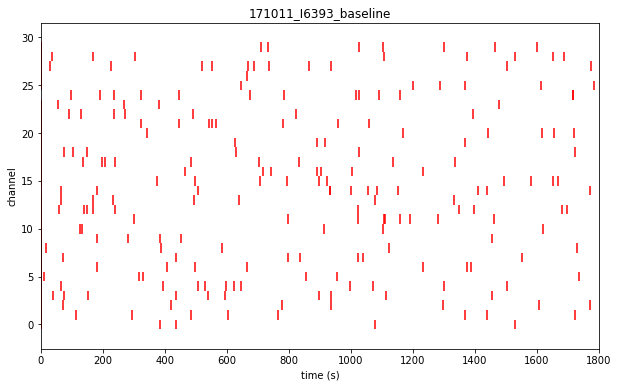

In [44]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# prints on first run: [8.0, 6.0] (standard width and height)
print("Current size:", fig_size)
 
# set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# plot data and build graph
plt.eventplot(full_data,colors=[[1,0,0]])
# plt.eventplot(np.zeros((num_chs+1,1)),colors=[[0,0,0]])
plt.title(y[:-4])
plt.ylabel('channel')
plt.xlabel('time (s)')
plt.xlim([0,1800])
plt.show()